<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse
import sqlite3

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

file_name = urlparse(file_path).path.strip('/').split('/')[-1]

In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.00,Agree,Disagree,Agree,Agree,Agree,Neither agree nor dis

### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



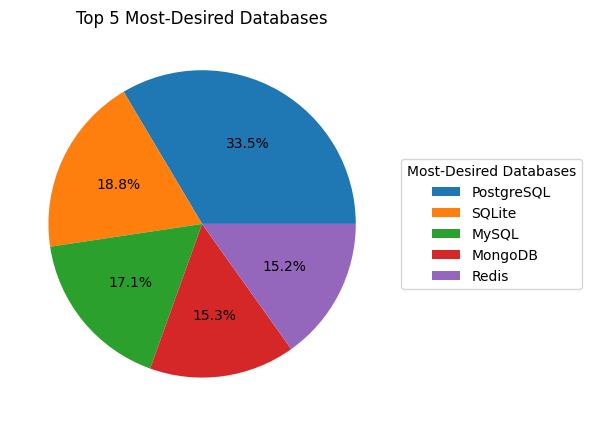

In [4]:
db_want = df.copy().loc[:,["DatabaseWantToWorkWith"]].dropna()
db_want = db_want["DatabaseWantToWorkWith"].str.split(";")
db_want_exploded = db_want.explode("DatabaseWantToWorkWith")
db_counts = db_want_exploded.value_counts().head(5)

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(data=db_counts, x=db_counts.values, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(db_counts.index),
    title="Most-Desired Databases",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Most-Desired Databases")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 1-1 Top 5 Most-Desired Databases")
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



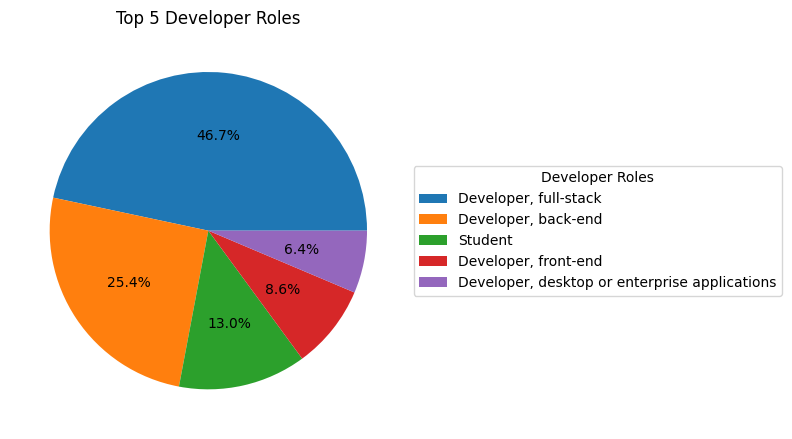

In [5]:
dev_type = df.copy().loc[:,["DevType"]].dropna()
dev_type = dev_type["DevType"].str.split(";")
dev_type_exploded = dev_type.explode("DevType")
dev_counts = dev_type_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=dev_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(dev_counts.index),
    title="Developer Roles",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Developer Roles")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 1-2 Top 5 Developer Roles")
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional use` column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [6]:
np.sort(df.columns.values)

array(['AIAcc', 'AIBen', 'AIChallenges', 'AIComplex', 'AIEthics',
       'AINextLess integrated', 'AINextMore integrated',
       'AINextMuch less integrated', 'AINextMuch more integrated',
       'AINextNo change', 'AISearchDevAdmired',
       'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith',
       'AISelect', 'AISent', 'AIThreat', 'AIToolCurrently Using',
       'AIToolInterested in Using', 'AIToolNot interested in Using',
       'Age', 'BuildvsBuy', 'BuyNewTool', 'Check', 'CodingActivities',
       'CompTotal', 'ConvertedCompYearly', 'Country', 'Currency',
       'DatabaseAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'EmbeddedAdmired',
       'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'Employment',
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'Frustration',
       'ICorPM', 'Industry', 'JobSat', 'JobSatPoints_1',
       'JobSatPoints_10', 'JobSatPoints_11', 'JobSatPoints_4',
       'JobSatPoints_5', 'JobSatPoints_

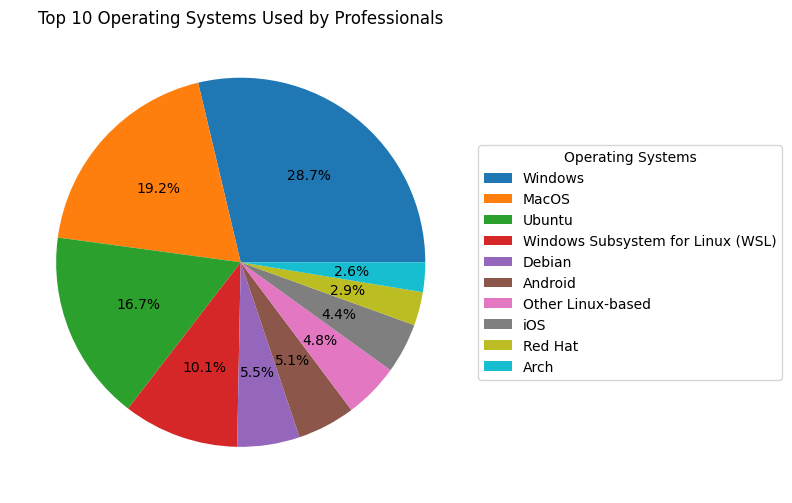

In [7]:
os_pro = df.copy().loc[:,["OpSysProfessional use"]].dropna()
os_pro = os_pro["OpSysProfessional use"].str.split(";")
os_pro_exploded = os_pro.explode("OpSysProfessional use")
os_pro_counts = os_pro_exploded.value_counts().head(10)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=os_pro_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(os_pro_counts.index),
    title="Operating Systems",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 10 Operating Systems Used by Professionals")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 1-3 Top 10 Operating Systems Used by Professionals")
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



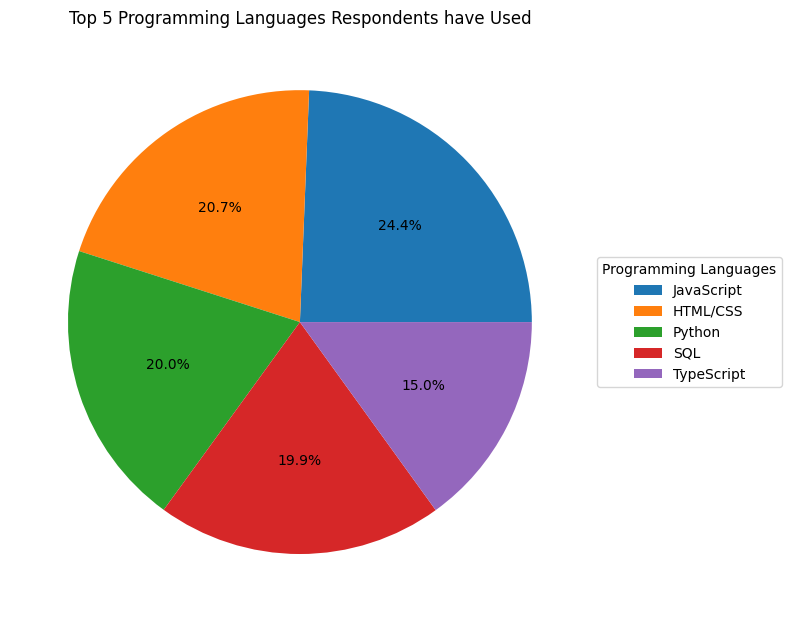

In [8]:
lang_worked = df.copy().loc[:,["LanguageHaveWorkedWith"]].dropna()
lang_worked = lang_worked["LanguageHaveWorkedWith"].str.split(";")
lang_worked_exploded = lang_worked.explode("LanguageHaveWorkedWith")
lang_worked_counts = lang_worked_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=lang_worked_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(lang_worked_counts.index),
    title="Programming Languages",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Programming Languages Respondents have Used")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 2-1 Top 5 Programming Languages Respondents have Used")
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



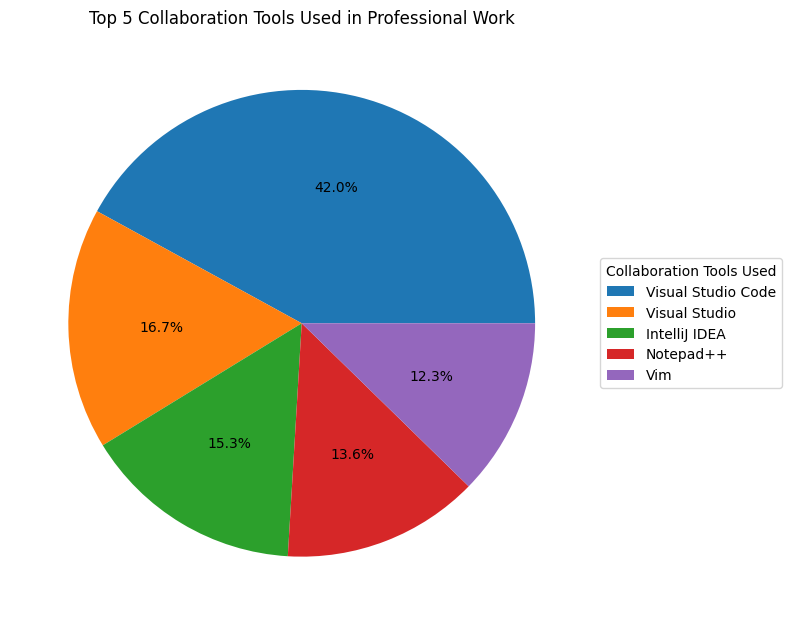

In [9]:
collab_tools_worked = df.copy().loc[:,["NEWCollabToolsHaveWorkedWith"]].dropna()
collab_tools_worked = collab_tools_worked["NEWCollabToolsHaveWorkedWith"].str.split(";")
collab_tools_worked_exploded = collab_tools_worked.explode("NEWCollabToolsHaveWorkedWith")
collab_tools_worked_counts = collab_tools_worked_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=collab_tools_worked_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(collab_tools_worked_counts.index),
    title="Collaboration Tools Used",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Collaboration Tools Used in Professional Work")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 2-2 Top 5 Collaboration Tools Used in Professional Work")
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



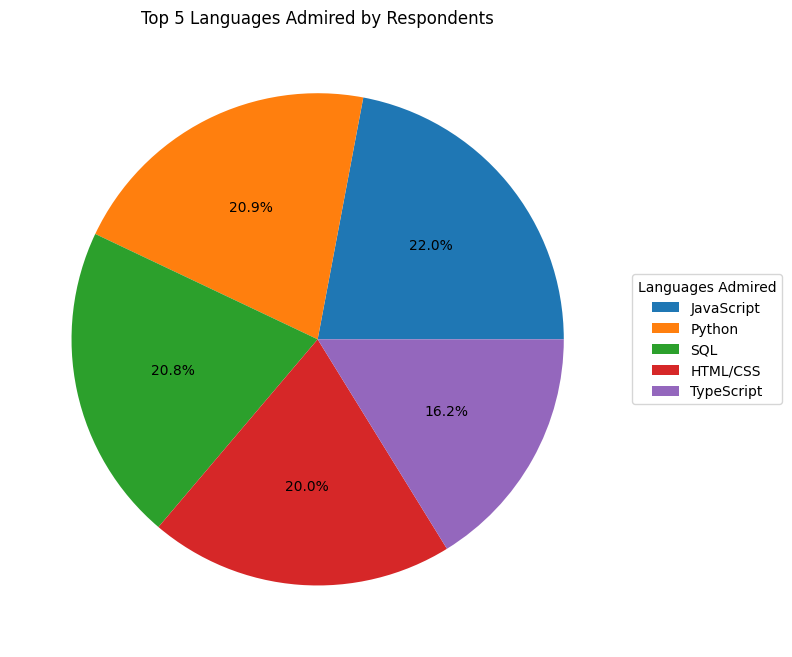

In [10]:
lang_admired = df.copy().loc[:,["LanguageAdmired"]].dropna()
lang_admired = lang_admired["LanguageAdmired"].str.split(";")
lang_admired_exploded = lang_admired.explode("LanguageAdmired")
lang_admired_counts = lang_admired_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=lang_admired_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(lang_admired_counts.index),
    title="Languages Admired",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Languages Admired by Respondents")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 3-1 Top 5 Languages Admired by Respondents")
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently Using` column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [11]:
curr_ai_tool = df.copy().loc[:,["AIToolCurrently Using"]].dropna()
curr_ai_tool = curr_ai_tool["AIToolCurrently Using"].str.split(";")
curr_ai_tool_exploded = curr_ai_tool.explode("AIToolCurrently Using")
curr_ai_tool_exploded.value_counts().head(5)

AIToolCurrently Using
Writing code                            29486
Search for answers                      24295
Debugging and getting help              20404
Documenting code                        14439
Generating content or synthetic data    12538
Name: count, dtype: int64

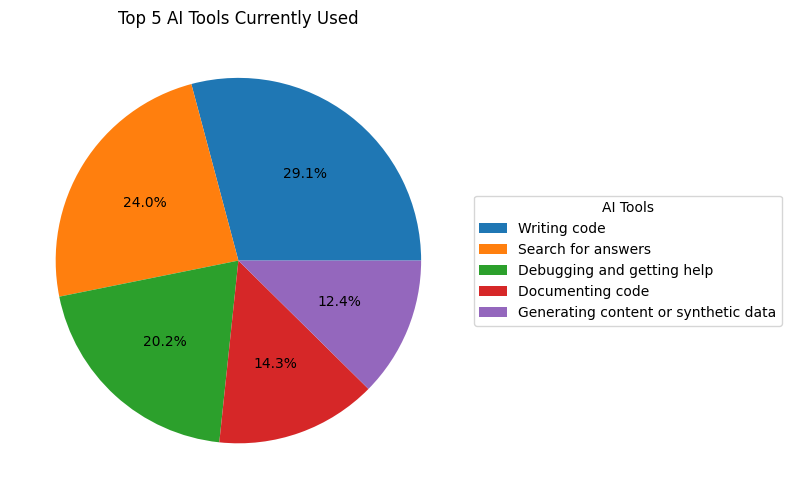

In [12]:
curr_ai_tool = df.copy().loc[:,["AIToolCurrently Using"]].dropna()
curr_ai_tool = curr_ai_tool["AIToolCurrently Using"].str.split(";")
curr_ai_tool_exploded = curr_ai_tool.explode("AIToolCurrently Using")
curr_ai_tool_counts = curr_ai_tool_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=curr_ai_tool_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(curr_ai_tool_counts.index),
    title="AI Tools",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 AI Tools Currently Used")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 3-2 Top 5 AI Tools Currently Used")
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



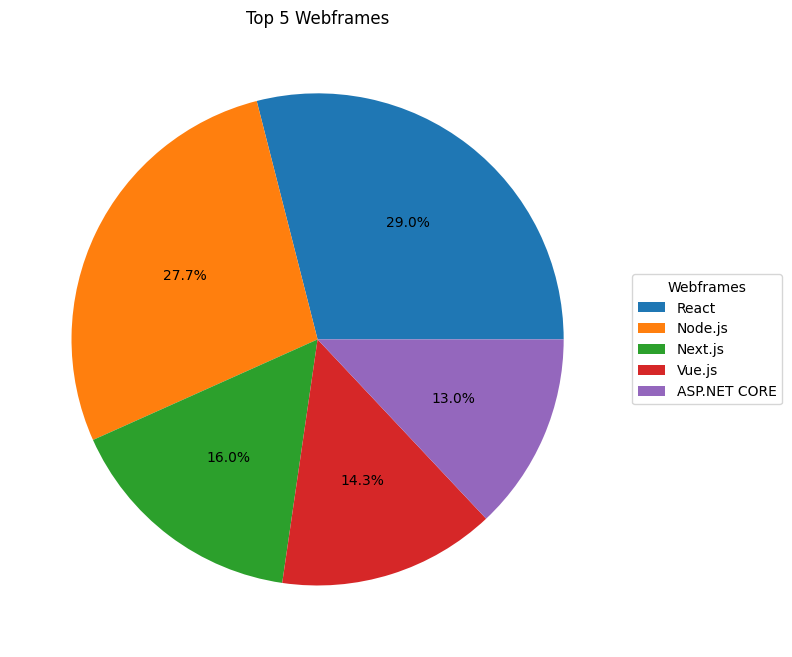

In [13]:
webframe = df.copy().loc[:,["WebframeWantToWorkWith"]].dropna()
webframe = webframe["WebframeWantToWorkWith"].str.split(";")
webframe_exploded = webframe.explode("WebframeWantToWorkWith")
webframe_counts = webframe_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=webframe_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(webframe_counts.index),
    title="Webframes",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Webframes")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 3-3 Top 5 Webframes")
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



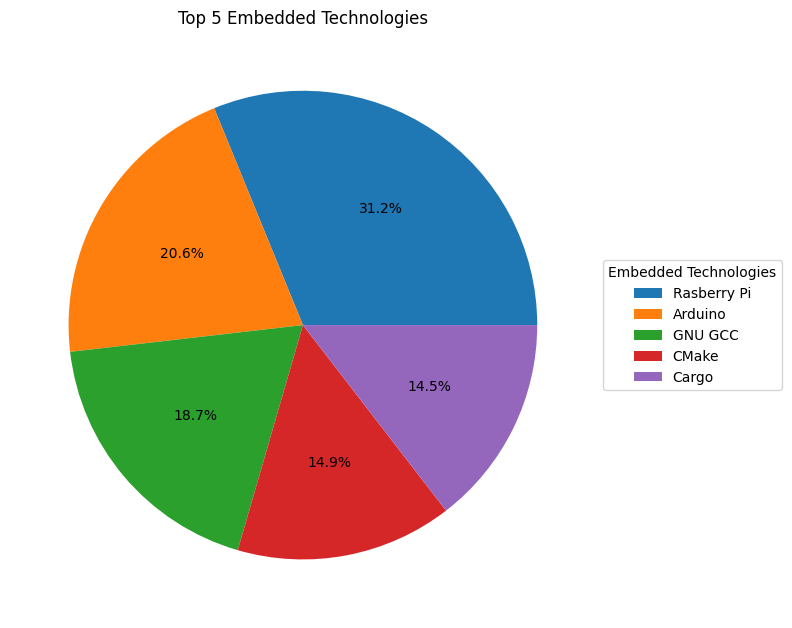

In [14]:
embedded_want = df.copy().loc[:,["EmbeddedWantToWorkWith"]].dropna()
embedded_want = embedded_want["EmbeddedWantToWorkWith"].str.split(";")
embedded_want_exploded = embedded_want.explode("EmbeddedWantToWorkWith")
embedded_want_counts = embedded_want_exploded.value_counts().head(5)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(x=embedded_want_counts.values, labels=None, autopct='%1.1f%%')

plt.legend(
    handles=wedges,
    labels=list(embedded_want_counts.index),
    title="Embedded Technologies",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Top 5 Embedded Technologies")
plt.tight_layout()

plt.savefig("Lab 21 Plots/Task 3-4 Top 5 Embedded Technologies")
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
